<a href="https://colab.research.google.com/github/somanathkshirsagar/-LeastSquare/blob/main/Regression_using_ANN_Cars24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author**: Somnath Tanaji Kshirasagr

Fergusson College, Pune

[Github](https://github.com/somanathkshirsagar) | [LinkedIn](https://www.linkedin.com/in/somnath-kshirasagar-73cba2212/)



#### 1. Loading required Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [17]:
import numpy as np               # Linear Algebra
import pandas as pd              # Data Handling
import seaborn as sns            # Visualization
import matplotlib.pyplot as plt  # Visualization
from datetime import date        # Used for Year
import warnings                  # For warnings
warnings.filterwarnings('ignore')

#### 2. Importing dataset into 'cars' dataframe

In [18]:
cars = pd.read_csv("/content/Cars24.csv")
cars.head()

,Title,cvakb,cvakb1,bvr0c,bvr0c2,bvr0c3,_7udzz,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,2020 KIA SELTOS,GTX + AT PETROL Automatic,Automatic,"8,241 km",1st Owner,Petrol,"?18,95,199",NaN,NaN,NaN,NaN,NaN,NaN
1,2020 Maruti Swift,LXI Manual,Manual,"10,568 km",1st Owner,Petrol,"?5,92,499",NaN,NaN,NaN,NaN,NaN,NaN
2,2019 Maruti Swift,LXI Manual,Manual,"27,659 km",1st Owner,Petrol,"?5,33,399",NaN,NaN,NaN,NaN,NaN,NaN
3,2020 KIA SELTOS,HTX 1.5 PETROL MT Manual,Manual,"32,799 km",1st Owner,Petrol,"?13,83,099",NaN,NaN,NaN,NaN,NaN,NaN
4,2014 Mercedes Benz C Class,C 200 AVANTGARDE Automatic,Automatic,"37,531 km",1st Owner,Petrol,"?20,33,499",NaN,NaN,NaN,NaN,NaN,NaN


#### 3. Feature Engineering

In [19]:
# To Perform Regex Operation
import re

# Will return string containing numbers
def find_number(text):
    num = re.findall(r'[0-9]+',text)
    return "".join(num)

# For Feature Engineering
def feature_engineering(cars):
    # First seven columns are relevant
    cars = cars.iloc[:,:7]

    # Giving Proper names to features
    cars.rename(columns = {'Title':'Name', 'cvakb':'Variant', 'cvakb1':'Transmission', 'bvr0c':'km_driven', 'bvr0c2':'Owner_Type', 'bvr0c3':'Fuel', '_7udzz':'Price'}, inplace = True)

    # Extracting only numbers
    cars["Price"] = cars["Price"].apply(lambda x: find_number(x))

    # Extracting year of purchase from Name
    cars["Year_Purchased"] = cars["Name"].str.split().str.slice(start=0,stop=1).str.join(' ')

    # Extracting name excluding year of purchase
    cars["Name"] = cars["Name"].str.split().str.slice(start=1,stop=3).str.join(' ')

    # Removing "km"
    cars["km_driven"] = cars["km_driven"].str.split().str.slice(start=0,stop=1).str.join(' ')

    # Extracting only numbers
    cars["km_driven"] = cars["km_driven"].apply(lambda x: find_number(x))

    # Removing Transmission type from the end of Variant
    cars["Variant"] = cars["Variant"].str.rsplit(' ',1).str[0]

    # Converting features to int
    cars = cars.astype({"km_driven":"int","Price":"int", "Year_Purchased":"int"})

    # Deriving Age of Vehical from Year of Purchase
    cars["Age"] = date.today().year - cars["Year_Purchased"]
    cars.drop(['Year_Purchased'], axis=1, inplace=True)

    return cars

In [20]:
cars = feature_engineering(cars)

In [21]:
cars.head()

,Name,Variant,Transmission,km_driven,Owner_Type,Fuel,Price,Age
0,KIA SELTOS,GTX + AT PETROL,Automatic,8241,1st Owner,Petrol,1895199,3
1,Maruti Swift,LXI,Manual,10568,1st Owner,Petrol,592499,3
2,Maruti Swift,LXI,Manual,27659,1st Owner,Petrol,533399,4
3,KIA SELTOS,HTX 1.5 PETROL MT,Manual,32799,1st Owner,Petrol,1383099,3
4,Mercedes Benz,C 200 AVANTGARDE,Automatic,37531,1st Owner,Petrol,2033499,9


#### 4. Description of Dataset

##### 4.1 Shape of Dataset

In [22]:
shape = cars.shape
print(f"There are \033[1m {shape[0]} rows\patterns \033[0m and \033[1m{shape[1]} features\033[0m.")

There are  656 rows\patterns  and 8 features.


##### 4.2 info

In [23]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          656 non-null    object
 1   Variant       656 non-null    object
 2   Transmission  632 non-null    object
 3   km_driven     656 non-null    int64 
 4   Owner_Type    656 non-null    object
 5   Fuel          656 non-null    object
 6   Price         656 non-null    int64 
 7   Age           656 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 41.1+ KB


##### 4.3 Missing Values for features

In [24]:
[[features,cars[features].isnull().sum()] for features in cars.columns if cars[features].isnull().sum()>0]

[['Transmission', 24]]

##### 4.4 Heat Map for Missing Values

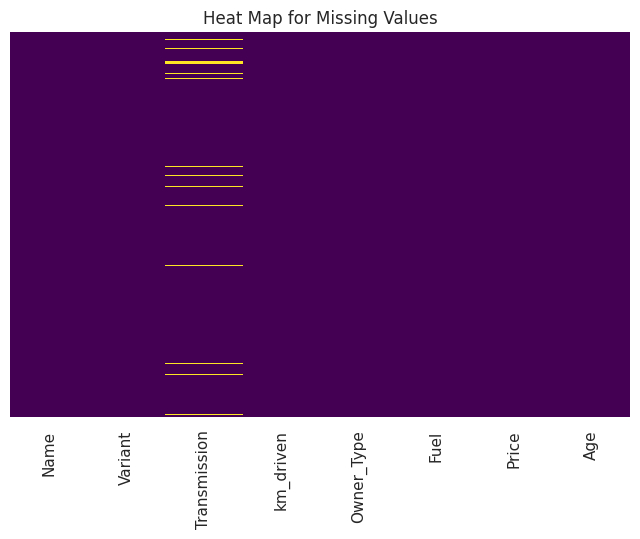

In [25]:
fig = sns.set(rc={'figure.figsize': (8, 5)})
plt.title("Heat Map for Missing Values")
sns.heatmap(cars.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

##### 4.5 Dropping NA values

In [26]:
cars.dropna(inplace=True)

Approximately, **3% values are Na**. Therefore, to simplify things, we dropped them.

#### 5. Exploratory Data Analysis

##### 5.1.1. Type of Owner and Number of Cars

In [27]:
cars['Owner_Type'].value_counts()

1st Owner    504
2nd Owner    123
3rd Owner      5
Name: Owner_Type, dtype: int64

##### 5.1.2. Countplot Owner Type Vs Number of Cars

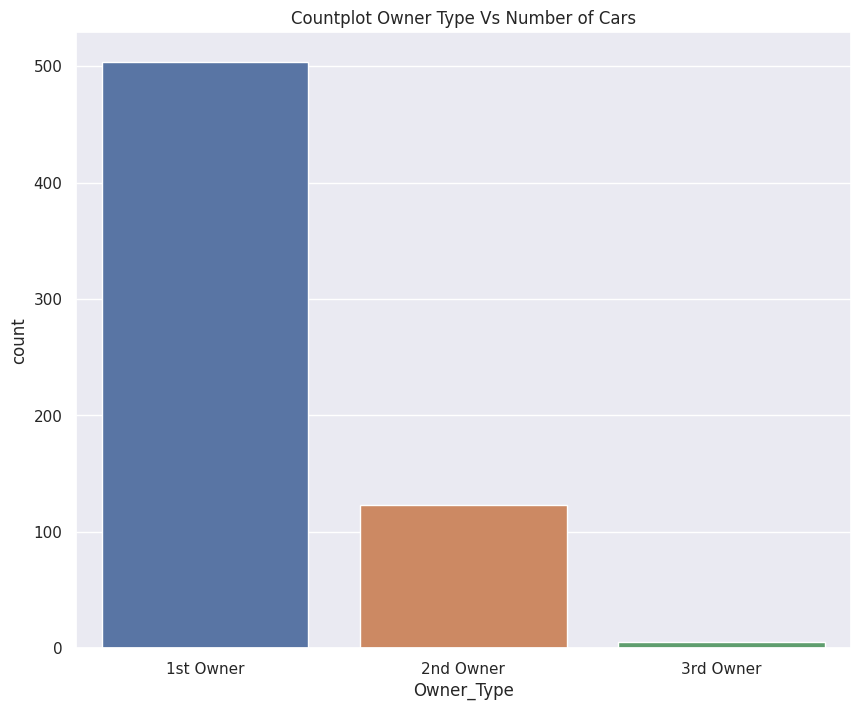

In [28]:
fig = sns.set(rc={'figure.figsize': (10, 8)})
plt.title("Countplot Owner Type Vs Number of Cars")
sns.countplot(x ='Owner_Type', data = cars)
plt.show()

**Observation**

**First Owned Cars** are **highest among all**.

##### 5.1.4. Pie Chart Type of Owner Vs Number of cars.

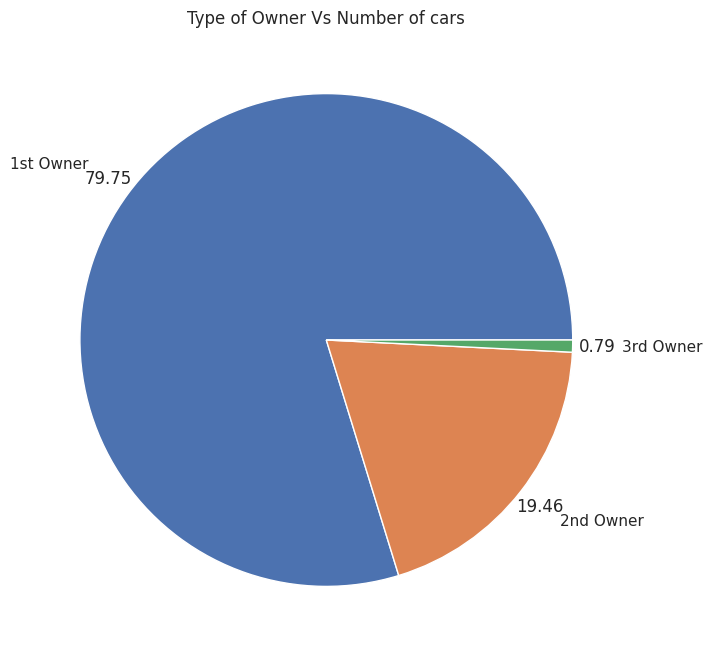

In [29]:
fig = sns.set(rc={'figure.figsize': (10, 8)})
plt.title("Type of Owner Vs Number of cars")
plt.pie(cars['Owner_Type'].value_counts(),labels=cars['Owner_Type'].unique(),pctdistance=1.1, labeldistance=1.2,autopct='%.2f')
plt.show()

**Observation**

1. **79.75 %** of cars are **First Owned**.
2. **19.46 %** of cars are **Second Owned**.
3. **0.79 %** of cars are **Third Owned**.

##### 5.2. Barplot Owner Type Vs Selling Price

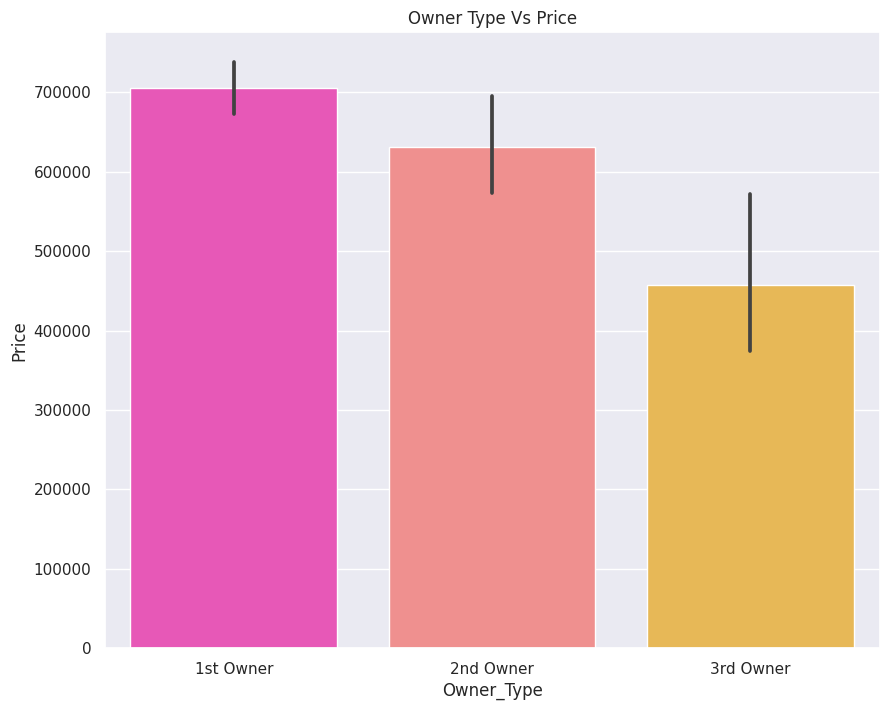

In [30]:
fig = sns.set(rc={'figure.figsize': (10, 8)})
plt.title("Owner Type Vs Price")
sns.barplot(x='Owner_Type',y='Price',data=cars,palette='spring')
plt.show()

**Observation**

**First Owner cars** have **high average selling price**.

As **number of owners** increases the **selling price** of car **decreases**.

##### 5.3.1. Automatic Vs Manual

In [31]:
cars['Transmission'].unique()

array(['Automatic', 'Manual', 'AUTOMATIC'], dtype=object)

In [32]:
cars['Transmission'] = np.where(cars['Transmission'] == 'AUTOMATIC', 'Automatic', cars['Transmission'])

In [33]:
cars['Transmission'].value_counts()

Manual       515
Automatic    117
Name: Transmission, dtype: int64

##### 5.3.2. Countplot Transmission Vs Number of Cars

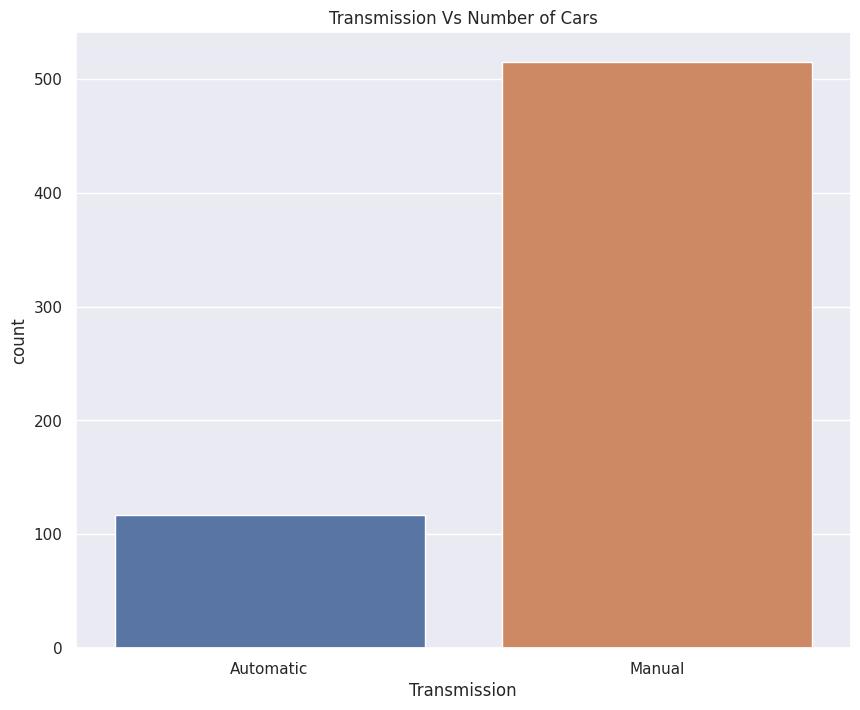

In [34]:
fig = sns.set(rc={'figure.figsize': (10, 8)})
plt.title("Transmission Vs Number of Cars")
sns.countplot(x ='Transmission', data = cars)
plt.show()

**Observation**

Most of the cars are **Manual**.

##### 5.4. Barplot Transmission Vs Selling Price

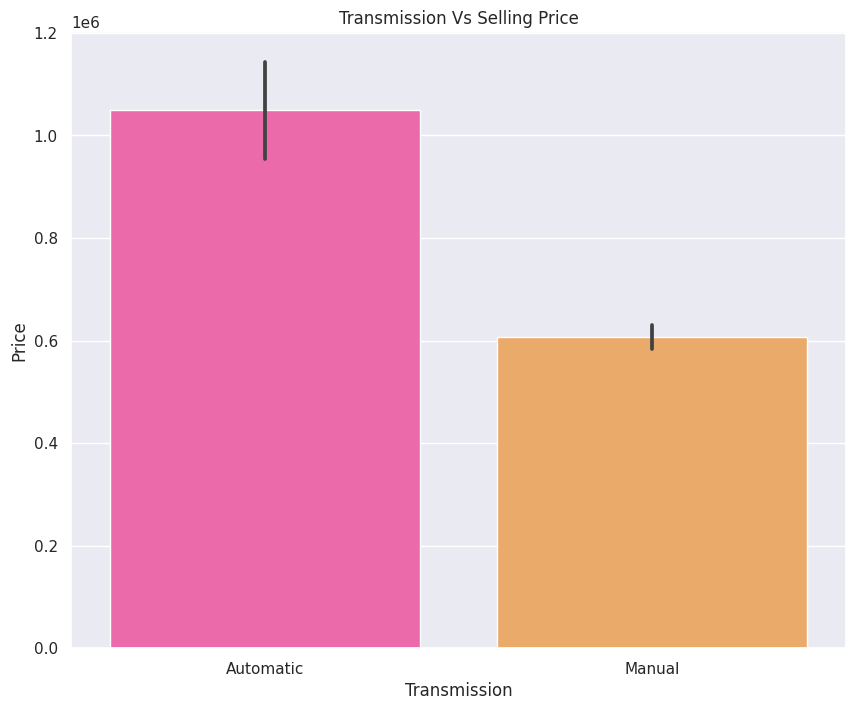

In [35]:
fig = sns.set(rc={'figure.figsize': (10, 8)})
plt.title("Transmission Vs Selling Price")
sns.barplot(x='Transmission',y='Price',data=cars,palette='spring')
plt.show()

**Observation**

Cars having **Automatic Transmission have high selling price**.

##### 5.5. Countplot Fuel Vs Number of Cars

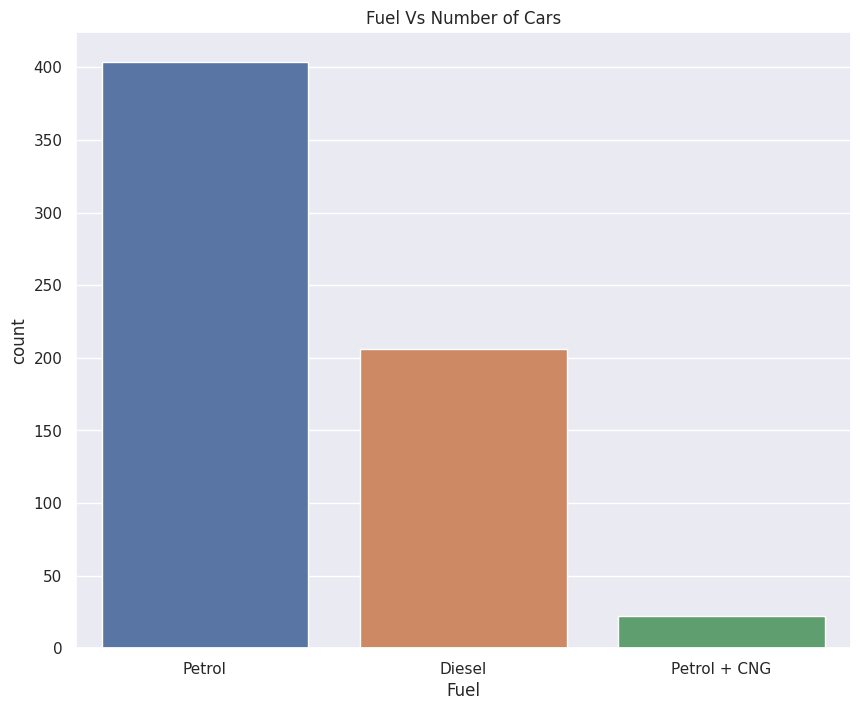

In [36]:
fig = sns.set(rc={'figure.figsize': (10, 8)})
plt.title("Fuel Vs Number of Cars")
sns.countplot(x ='Fuel', data = cars)
plt.show()

**Observation**

Most of the cars are **Petrol**.

##### 5.6. Barplot Fuel Vs Selling Price

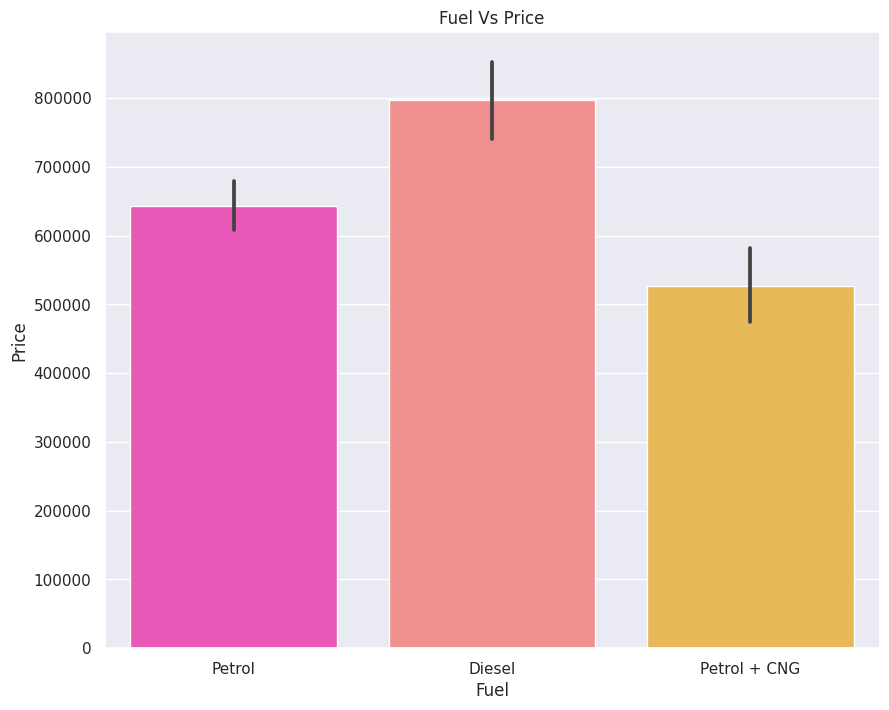

In [37]:
fig = sns.set(rc={'figure.figsize': (10, 8)})
plt.title("Fuel Vs Price")
sns.barplot(x='Fuel',y='Price',data=cars,palette='spring')
plt.show()

**Observation**

**Diesel cars** have **high average selling price**.

##### 5.7. Age Vs Price

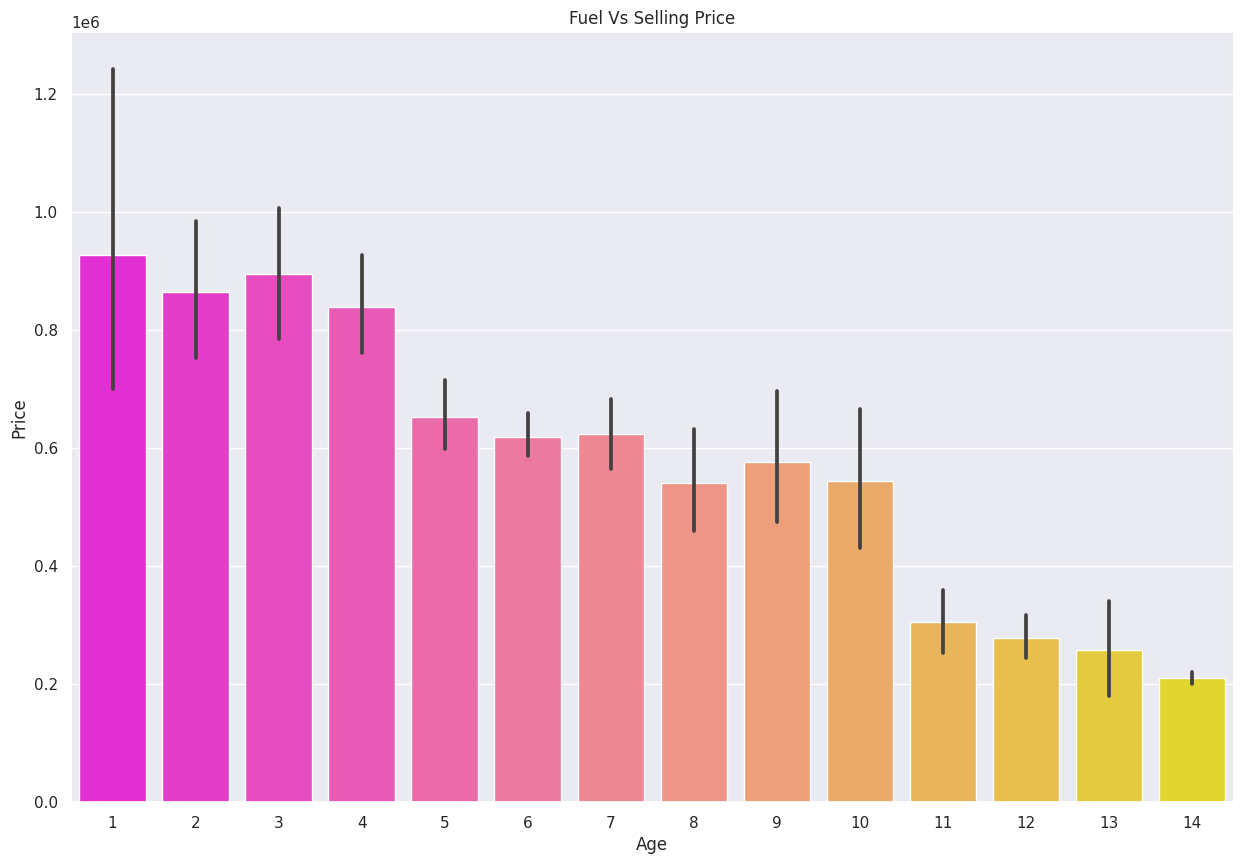

In [38]:
fig = sns.set(rc={'figure.figsize': (15, 10)})
plt.title("Fuel Vs Selling Price")
sns.barplot(x ='Age', y="Price", data = cars ,palette='spring')
plt.show()

**Observation**

As the age of Vehical increases, Price Decreases.

#### 6. Model Fitting

##### 6.1 Outliers

Before, fitting any model we need to analyse outliers in the dataset.

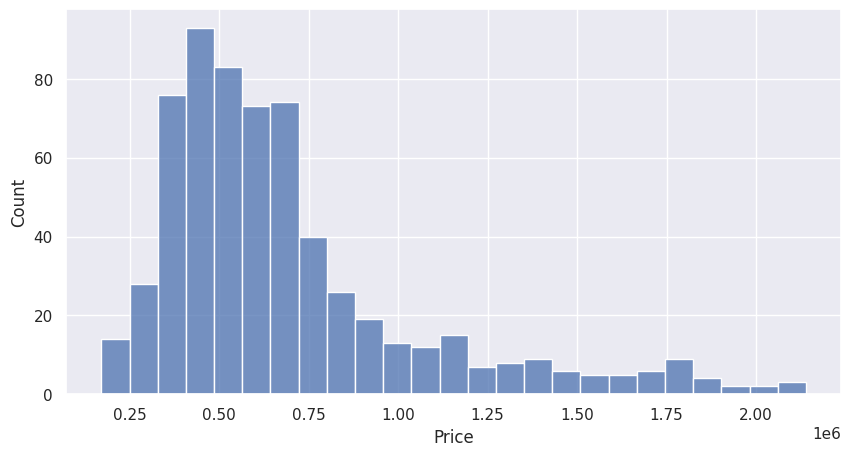

In [39]:
fig = sns.set(rc={'figure.figsize': (10, 5)})
sns.histplot(cars['Price'])
# plt.hist(cars['Price'], bins=20, rwidth=0.8)
plt.show()

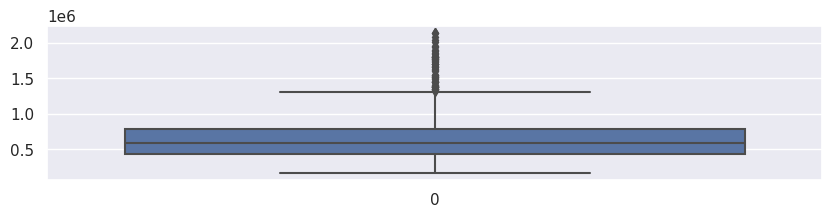

In [40]:
fig = sns.set(rc={'figure.figsize': (10, 2)})
sns.boxplot(cars['Price'])
plt.show()

**Observation**

As we can see, there are more than one outliers in the feature **Price**.

In [41]:
cars['zscore'] = (cars['Price'] - cars['Price'].mean()) / cars['Price'].std()
cars.head()

,Name,Variant,Transmission,km_driven,Owner_Type,Fuel,Price,Age,zscore
0,KIA SELTOS,GTX + AT PETROL,Automatic,8241,1st Owner,Petrol,1895199,3,3.225112
1,Maruti Swift,LXI,Manual,10568,1st Owner,Petrol,592499,3,-0.257488
2,Maruti Swift,LXI,Manual,27659,1st Owner,Petrol,533399,4,-0.415484
3,KIA SELTOS,HTX 1.5 PETROL MT,Manual,32799,1st Owner,Petrol,1383099,3,1.856079
4,Mercedes Benz,C 200 AVANTGARDE,Automatic,37531,1st Owner,Petrol,2033499,9,3.594840


In [42]:
outliers = cars[(cars['zscore'] < -3) | (cars['zscore'] > 3)]
outliers.head()

,Name,Variant,Transmission,km_driven,Owner_Type,Fuel,Price,Age,zscore
0,KIA SELTOS,GTX + AT PETROL,Automatic,8241,1st Owner,Petrol,1895199,3,3.225112
4,Mercedes Benz,C 200 AVANTGARDE,Automatic,37531,1st Owner,Petrol,2033499,9,3.594840
34,MG HECTOR,SHARP HYBRID PETROL,Manual,12185,2nd Owner,Petrol,1848299,3,3.099731
37,Jeep Compass,1.4 LONGITUDE (O) AT,Automatic,23327,1st Owner,Petrol,2012799,4,3.539501
38,Jeep Compass,2.0 LIMITED,Manual,46860,1st Owner,Diesel,1941699,4,3.349424


In [43]:
outliers.shape

(12, 9)

In [44]:
cars = cars[(cars['zscore'] > -3) & (cars['zscore'] < 3)]
cars.head()

,Name,Variant,Transmission,km_driven,Owner_Type,Fuel,Price,Age,zscore
1,Maruti Swift,LXI,Manual,10568,1st Owner,Petrol,592499,3,-0.257488
2,Maruti Swift,LXI,Manual,27659,1st Owner,Petrol,533399,4,-0.415484
3,KIA SELTOS,HTX 1.5 PETROL MT,Manual,32799,1st Owner,Petrol,1383099,3,1.856079
6,Hyundai i10,ERA 1.1 IRDE,Manual,37928,1st Owner,Petrol,271699,10,-1.115106
7,Honda City,VX MT PETROL,Manual,61168,2nd Owner,Petrol,658499,9,-0.081046


In [45]:
del cars["zscore"]

##### 6.2. One Hot Encoding

In [46]:
cars = pd.get_dummies(data=cars, columns=['Name','Variant','Transmission','Owner_Type','Fuel'])

##### 6.3. Splitting Data into X and y

In [47]:
X = cars.drop(columns =['Price'])
y = cars['Price']

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [49]:
print("X-Train:", X_train.shape[1])

X-Train: 333


##### 6.4. Standard Scaler

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)

In [51]:
X_train.loc[:,['km_driven', 'Age']] = scaler.fit_transform(X_train.loc[:,['km_driven', 'Age']].to_numpy())
X_train.loc[:,['km_driven', 'Age']].head()

,km_driven,Age
72,1.109006,4.042672
202,1.949730,1.617069
436,2.857826,2.425603
56,0.555307,1.212802
289,0.286440,1.212802


In [52]:
X_test.loc[:,['km_driven', 'Age']] = scaler.transform(X_test.loc[:,['km_driven', 'Age']].to_numpy())
X_test.loc[:,['km_driven', 'Age']].head()

,km_driven,Age
344,1.663180,1.617069
183,1.839685,1.617069
223,1.673520,1.617069
319,1.096657,0.808534
29,1.619520,5.659741


##### 6.5. Define Base Model

In [53]:
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense

In [54]:
def baseline_model():
    # create model
    model = Sequential()

    model.add(Dense(900, input_dim=333, activation='relu'))

    model.add(Dense(500, activation='relu'))

    model.add(Dense(333, activation='relu'))

    model.add(Dense(1))

    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [55]:
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=3, verbose=1)

##### 6.6. Training

In [56]:
history = estimator.fit(X_train,y_train)

Epoch 1/100
145/145 [==============================] - 3s 11ms/step - loss: 444841623552.0000
Epoch 2/100
145/145 [==============================] - 1s 10ms/step - loss: 149646016512.0000
Epoch 3/100
145/145 [==============================] - 1s 10ms/step - loss: 125099474944.0000
Epoch 4/100
145/145 [==============================] - 2s 13ms/step - loss: 101053112320.0000
Epoch 5/100
145/145 [==============================] - 2s 14ms/step - loss: 75952996352.0000
Epoch 6/100
145/145 [==============================] - 1s 10ms/step - loss: 52536217600.0000
Epoch 7/100
145/145 [==============================] - 1s 10ms/step - loss: 36272066560.0000
Epoch 8/100
145/145 [==============================] - 1s 10ms/step - loss: 24771534848.0000
Epoch 9/100
145/145 [==============================] - 1s 10ms/step - loss: 17945415680.0000
Epoch 10/100
145/145 [==============================] - 1s 10ms/step - loss: 12957139968.0000
Epoch 11/100
145/145 [==============================] - 1s 10ms/s

##### 6.7. Model Evaluation

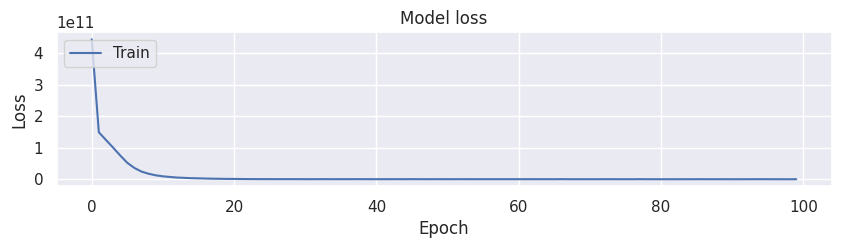

In [57]:
# Plot training & validation loss values
plt.plot(history.history['loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [58]:
from sklearn.metrics import accuracy_score

prediction = estimator.predict(X_test)

62/62 [==============================] - 1s 4ms/step


In [59]:
train_error =  np.abs(y_test - prediction)
mean_error = np.mean(train_error)
min_error = np.min(train_error)
max_error = np.max(train_error)
std_error = np.std(train_error)

In [60]:
print("std_error: ", std_error)
print("mean_error: ", mean_error)
print("min_error: ", min_error)
print("max_error: ", max_error)

std_error:  91592.0647853664
mean_error:  70467.67204301075
min_error:  637.3125
max_error:  469596.125


In [61]:
from sklearn.metrics import r2_score
print("r_square score(Test Dataset): ", r2_score(y_test,prediction))

train_prediction = estimator.predict(X_train)
print("r_square score (Train Dataset): ", r2_score(y_train,train_prediction))

r_square score(Test Dataset):  0.8831284920999656
145/145 [==============================] - 1s 3ms/step
r_square score (Train Dataset):  0.9953178309715544
